In [1]:
#importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


**1.How is Age of Wine and Alcohol % affecting Price?**


*   To analyze how the Age of Wine and Alcohol % affect Price, we can create a 
scatter plot for each variable, where the x-axis represents Age or Alcohol % and the y-axis represents Price.  
*  We can also calculate the correlation coefficient between each variable and Price to determine the strength and direction of their relationship




In [3]:
# load data into a Pandas DataFrame
data = pd.read_csv("/content/Wine_dataset.csv")
data.head()

,Age,Alcohol_percent,Price
0,102,9,875
1,119,7,929
2,179,9,1792
3,111,9,980
4,150,9,1522


In [4]:
print("Number of Rows in the dataset: ",data.shape[0])
print("Number of Rows in the dataset: ",data.shape[1])

Number of Rows in the dataset:  50
Number of Rows in the dataset:  3


In [5]:
#checking the data type and number of columns
data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              50 non-null     int64
 1   Alcohol_percent  50 non-null     int64
 2   Price            50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [6]:
#checking null values
data.isnull().sum()

Age                0
Alcohol_percent    0
Price              0
dtype: int64

In [7]:
#statistical Information about numerical columns
data.describe()

,Age,Alcohol_percent,Price
count,50.000000,50.0000,50.000000
mean,141.900000,9.4400,1343.160000
std,28.074427,2.7491,405.459797
min,102.000000,5.0000,669.000000
25%,117.000000,7.0000,1029.750000
50%,137.000000,9.0000,1296.000000
75%,166.500000,11.7500,1660.500000
max,194.000000,15.0000,2238.000000


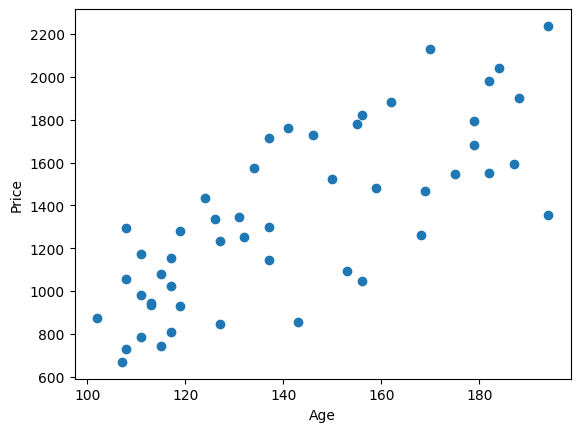

In [8]:
# create a scatter plot for Age vs. Price
plt.scatter(data['Age'], data['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

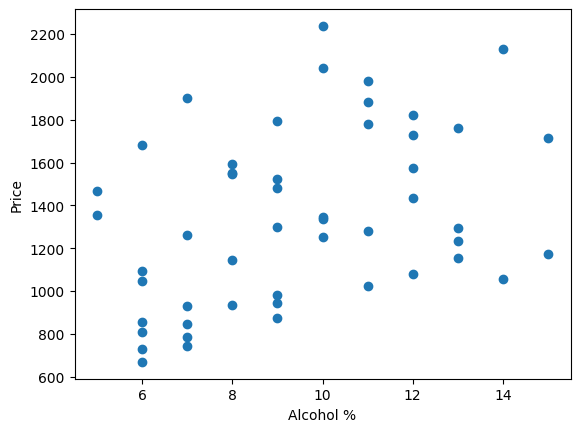

In [9]:
# create a scatter plot for Alcohol % vs. Price
plt.scatter(data['Alcohol_percent'], data['Price'])
plt.xlabel('Alcohol %')
plt.ylabel('Price')
plt.show()

In [10]:
# calculate the correlation coefficient between Age and Price
age_corr = data['Age'].corr(data['Price'])
print(f"Correlation coefficient between Age and Price: {age_corr:.2f}")

Correlation coefficient between Age and Price: 0.76


In [11]:
# calculate the correlation coefficient between Alcohol % and Price
alcohol_corr = data['Alcohol_percent'].corr(data['Price'])
print(f"Correlation coefficient between alcohol% and Price: {alcohol_corr:.2f}")

Correlation coefficient between alcohol% and Price: 0.38


In [12]:
# Split the data into X (Age and Alcohol_percent) and y (Price)
X = data[['Age', 'Alcohol_percent']]
y = data['Price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Print the coefficients
print('Intercept:',regressor.intercept_)
print('Age coefficient:',regressor.coef_[0])
print('Alcohol_percent coefficient:', regressor.coef_[1])

Intercept: -1330.868659114255
Age coefficient: 12.78734591804208
Alcohol_percent coefficient: 89.90307355336846


In [16]:
y_pred = regressor.predict(X_test) 
y_pred

array([1279.7081688 ,  589.58314135, 1640.88707152,  833.32601805,
       1614.92072756, 1243.30439168, 1333.59911736, 1769.54383496,
       1437.07284109, 1256.0917376 ])

In [17]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.8271318893289831


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 118.43797773102122
Mean Squared Error: 18391.972456751468
Root Mean Squared Error: 135.6170065174404


In [24]:
import numpy as np

# Predict the price of a bottle with age 120 years and alcohol percentage 15% 
x_new = np.array([[120, 15]])
pred = regressor.predict(x_new)
pred


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1552.15895435])